In [1]:
import tensorboard as tb
import pandas as pd
import numpy as np
import gc
import os
import subprocess
import shutil
import json
import random
import string
import imageio
import seaborn as sns
import matplotlib.pyplot as plt
#from IPython.display import Image, set_matplotlib_formats
from PIL import Image, ImageEnhance, ImageOps
import time


import glob
import os
import pprint
import traceback
import click
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [2]:
from google.colab import drive 
drive.mount('/content/drive')
gdrive_link = "/content/drive/MyDrive/MasterTensorboardandCheckpoits/"
logs2 = "/content/drive/MyDrive/MasterTensorboardandCheckpoits/ViTGoogle"
logs = gdrive_link

Mounted at /content/drive


Get data using Tensorboard experimental

In [ ]:
%load_ext tensorboard

In [ ]:
!tensorboard dev list

In [ ]:
chosen_dir = "/content/drive/MyDrive/MasterTensorboardandCheckpoits/ResNetUntrainedSUN"

In [ ]:
!tensorboard dev upload --logdir="/content/drive/MyDrive/MasterTensorboardandCheckpoits" \
  --name "No Name" \
  --description "No description" 

In [ ]:
experiment_id = "1H3DFNR8Qqm0GFPi8ipNKQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

In [ ]:
columns = [
    'epoch',
    'train_accuracy_1_step',
    'train_loss_step'
    'Validation_accuracy_1',
    'Validation_accuracy_5',
    'Validation_loss',
    'train_accuracy_1_epoch',
    'train_loss_epoch',]

# ResNet on SUN datset

df_1 = df[df["run"] == "ResNetSun/version_0"]
df_1 = df_1[columns]
path = "/content/drive/MyDrive/MasterTensorboardandCheckpoits/ResNetSun/dataframe/ResNetSun_df.csv"
#df_1.to_csv(path)

# ResNET Untrained on SUN dataset 


# Get data using custom function

In [9]:

def tflog2pandas(path: str) -> pd.DataFrame:
    
    DSG = {
        "compressedHistograms": 1,
        "images": 1,
        "scalars": 0,  # get thisone!
        "histograms": 1,
    }

    runlog_data = pd.DataFrame({"metric": [], "value": [], "step": []})

    try:
        event_acc = EventAccumulator(path, DSG)
        event_acc.Reload()
        tags = event_acc.Tags()["scalars"]


        for tag in tags:
            event_list = event_acc.Scalars(tag)
            values = list(map(lambda x: x.value, event_list))
            step = list(map(lambda x: x.step, event_list))
            r = {"metric": [tag] * len(step), "value": values, "step": step}
            r = pd.DataFrame(r)
            runlog_data = pd.concat([runlog_data, r])
        
    except Exception:
        print("Event file possibly corrupt: {}".format(path))
        traceback.print_exc()
    return runlog_data


In [10]:
# SUN

df_resnet_SUN = tflog2pandas("/content/drive/MyDrive/MasterTensorboardandCheckpoits/ResNetSun/version_0/")
df_resnet_untrained_SUN = tflog2pandas("/content/drive/MyDrive/MasterTensorboardandCheckpoits/ResNetUntrainedSUN/version_0/")
df_vit_SUN = tflog2pandas("/content/drive/MyDrive/MasterTensorboardandCheckpoits/VIT_pretrained_SUN/version_0")
df_beit_SUN = tflog2pandas("/content/drive/MyDrive/MasterTensorboardandCheckpoits/Beit_pretrained_SUN/version_0")
df_next_SUN = tflog2pandas("/content/drive/MyDrive/MasterTensorboardandCheckpoits/ConvNext_pretrained_SUN/version_0")

In [ ]:
df_resnet_SUN.to_csv("/content/drive/MyDrive/MasterTensorboardandCheckpoits/ResNetSun/version_0/df.csv", index = False)
df_resnet_untrained_SUN.to_csv("/content/drive/MyDrive/MasterTensorboardandCheckpoits/ResNetUntrainedSUN/version_0/df.csv", index = False)
df_vit_SUN.to_csv("/content/drive/MyDrive/MasterTensorboardandCheckpoits/VIT_pretrained_SUN/version_0/df.csv", index = False)

In [ ]:
df_beit_SUN.to_csv("/content/drive/MyDrive/MasterTensorboardandCheckpoits/Beit_pretrained_SUN/version_0/df.csv", index = False)
df_next_SUN.to_csv("/content/drive/MyDrive/MasterTensorboardandCheckpoits/ConvNext_pretrained_SUN/version_0/df.csv", index = False)

ResNet on SUN dataset

In [11]:
df = df_resnet_SUN

In [ ]:
path = "/content/drive/MyDrive/MasterTensorboardandCheckpoits/ResNetSun/dataframe/ResNetSun_df.csv"
df = pd.read_csv(path)
set(df.tag)

In [12]:
keys_step = [
 'epoch',
 'train_accuracy_1_step',
 'train_loss_step']

keys_epoch = [
    'Validation_accuracy_1',
    'Validation_accuracy_5',
    'Validation_loss',
    'train_accuracy_1_epoch',
    'train_loss_epoch',]

keys_extra = [
    'train_accuracy_1_epoch',
    'train_loss_epoch',
    ]

In [13]:
data_step = {}
data_epoch = {}
data_extra = {}
for key in keys_step:
    df_ = df[df.metric == key][["step", "value"]]
    x, y = df_["step"].values, df_["value"].values
    data_step[key] = [x, y]

for key in keys_epoch:
    df_ = df[df.metric == key][["step", "value"]]
    x, y = df_["step"].values, df_["value"].values
    x = np.arange(len(x))
    data_epoch[key] = [x, y]

for key in keys_extra:
    df_ = df[df.metric == key][["step", "value"]]
    x, y = df_["step"].values, df_["value"].values
    data_extra[key] = [x, y]

In [14]:
step = data_step['train_accuracy_1_step'][0]
print("Step size ", step[0])
print("Steps", step[-1])
print("Steps", len(step))

Step size  49.0
Steps 271899.0
Steps 5438


In [ ]:
for key in data_step.keys():
    fig, ax = plt.subplots()
    ax.set_title(key)
    x, y = data_step[key]
    ax.plot(x, y, linewidth=1.0)
    if "loss" in key:
        ax.set_ylabel("Cross-Entropy Loss")
    else:
        ax.set_ylabel("Accuracy")

    ax.set_xlabel("Step")
    plt.show()

In [ ]:
for key in data_epoch.keys():
    fig, ax = plt.subplots()
    ax.set_title(key)
    x, y = data_epoch[key]
    ax.plot(x, y, linewidth=1.0)
    ax.set_xlabel("Epoch")
    if "loss" in key:
        ax.set_ylabel("Cross-Entropy Loss")
    else:
        ax.set_ylabel("Accuracy")
    plt.show()

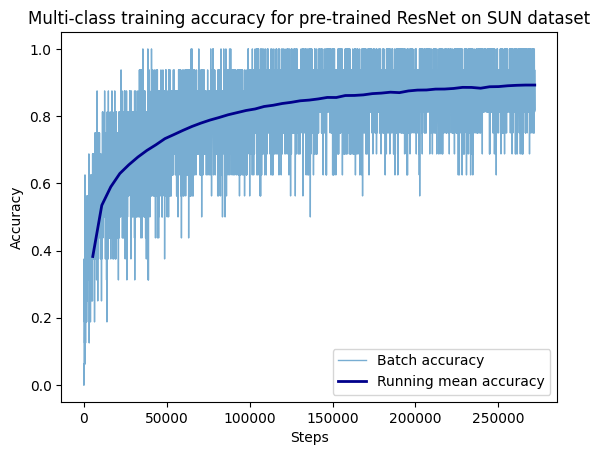

In [24]:
key_1 = 'train_accuracy_1_step'
key_2 = 'train_accuracy_1_epoch'

fig, ax = plt.subplots()
title = "Multi-class training accuracy for pre-trained ResNet on SUN dataset"
ax.set_title(title)

x, y = data_step[key_1]
ax.plot(x, y, linewidth=1.0, alpha = 0.6, label = "Batch accuracy")

x, y = data_extra[key_2]
ax.plot(x, y, linewidth=2.0, color = "darkblue", label = "Running mean accuracy")

ax.legend()
ax.set_xlabel("Steps")
ax.set_ylabel("Accuracy")
plt.savefig(fname = pltName(title), format = "png")
plt.savefig(fname = pltNameSVG(title), format = "svg")
plt.show()

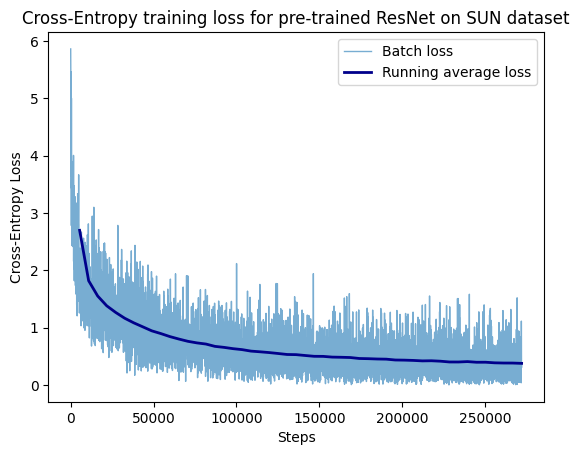

In [25]:
key_1 = 'train_loss_step'
key_2 = 'train_loss_epoch'

fig, ax = plt.subplots()
title = "Cross-Entropy training loss for pre-trained ResNet on SUN dataset"
ax.set_title(title)

x, y = data_step[key_1]
ax.plot(x, y, linewidth=1.0, alpha = 0.6,  label = "Batch loss")

x, y = data_extra[key_2]
ax.plot(x, y, linewidth=2.0, color = "darkblue", label = "Running average loss")

ax.legend()
ax.set_xlabel("Steps")
ax.set_ylabel("Cross-Entropy Loss")
plt.savefig(fname = pltName(title), format = "png")
plt.savefig(fname = pltNameSVG(title), format = "svg")
plt.show()

BEIT

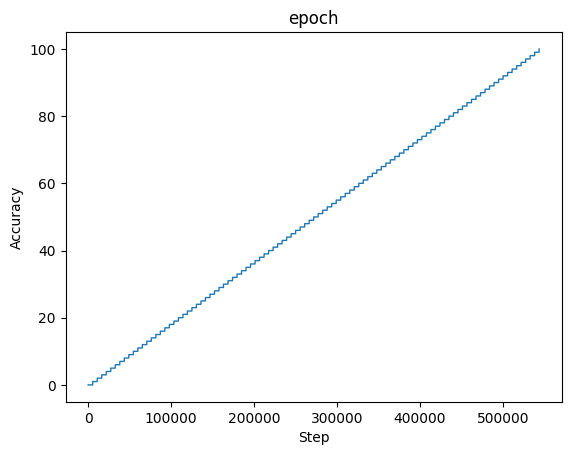

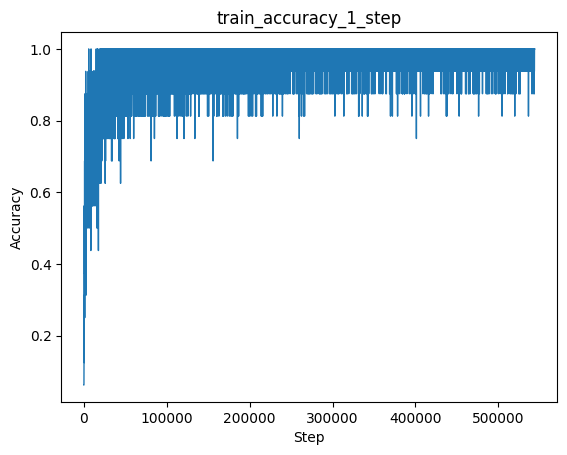

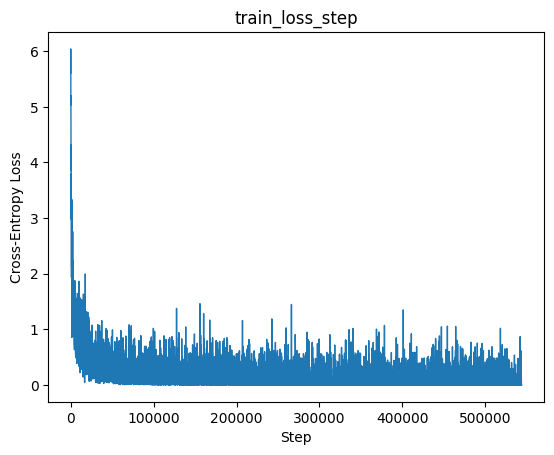

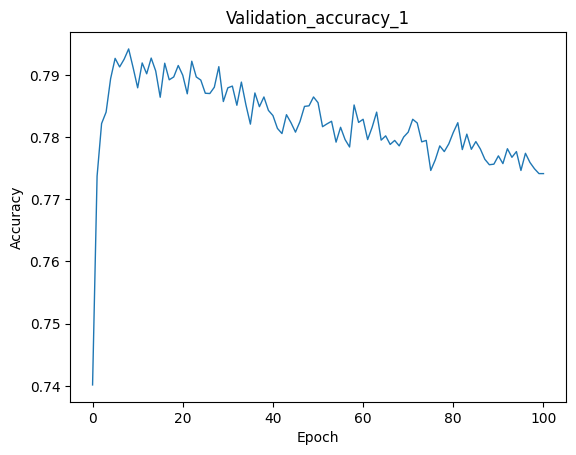

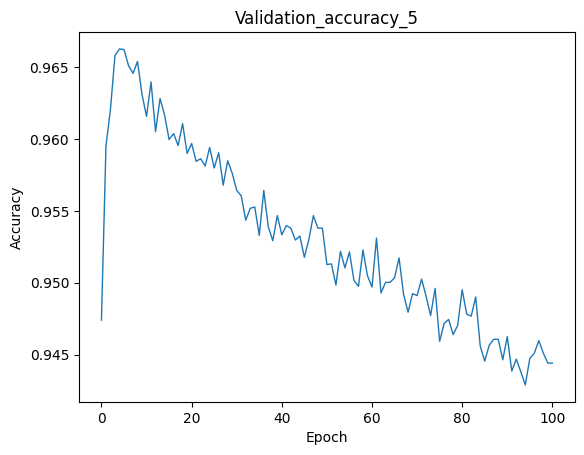

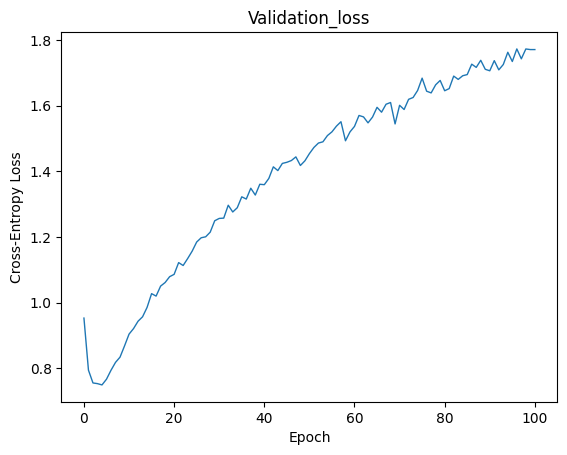

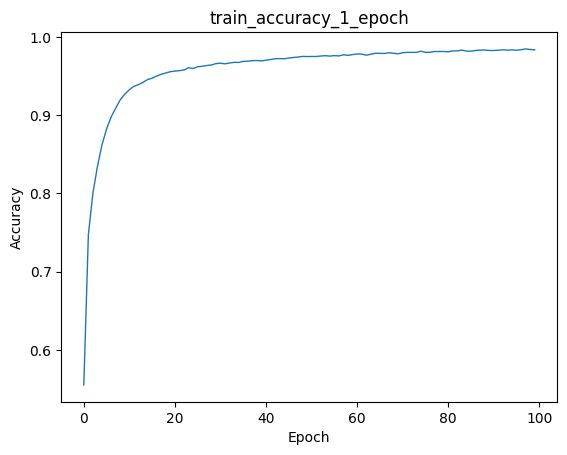

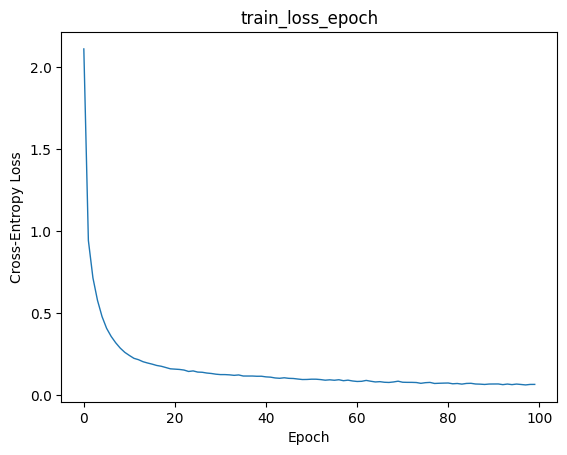

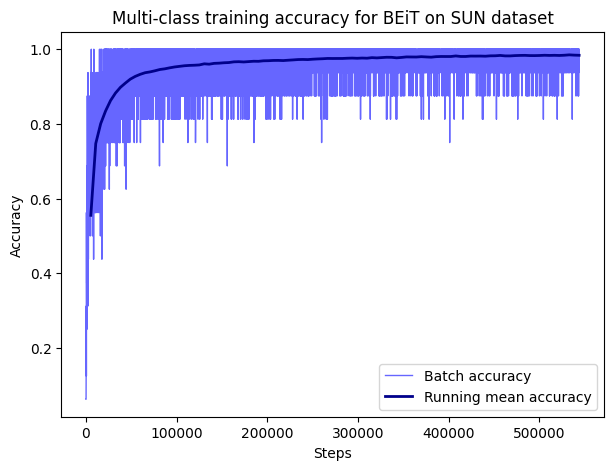

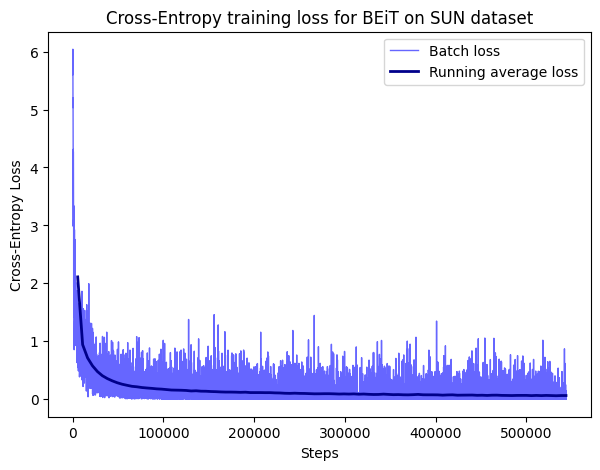

In [63]:
df = df_beit_SUN

# Keys
keys_step = [
 'epoch',
 'train_accuracy_1_step',
 'train_loss_step']

keys_epoch = [
    'Validation_accuracy_1',
    'Validation_accuracy_5',
    'Validation_loss',
    'train_accuracy_1_epoch',
    'train_loss_epoch',]

keys_extra = [
    'train_accuracy_1_epoch',
    'train_loss_epoch',
    ]


data_step = {}
data_epoch = {}
data_extra = {}
for key in keys_step:
    df_ = df[df.metric == key][["step", "value"]]
    x, y = df_["step"].values, df_["value"].values
    data_step[key] = [x, y]

for key in keys_epoch:
    df_ = df[df.metric == key][["step", "value"]]
    x, y = df_["step"].values, df_["value"].values
    x = np.arange(len(x))
    data_epoch[key] = [x, y]

for key in keys_extra:
    df_ = df[df.metric == key][["step", "value"]]
    x, y = df_["step"].values, df_["value"].values
    data_extra[key] = [x, y]

step = data_step['train_accuracy_1_step'][0]


for key in data_step.keys():
    fig, ax = plt.subplots()
    ax.set_title(key)
    x, y = data_step[key]
    ax.plot(x, y, linewidth=1.0)
    if "loss" in key:
        ax.set_ylabel("Cross-Entropy Loss")
    else:
        ax.set_ylabel("Accuracy")

    ax.set_xlabel("Step")
    plt.show()


for key in data_epoch.keys():
    fig, ax = plt.subplots()
    ax.set_title(key)
    x, y = data_epoch[key]
    ax.plot(x, y, linewidth=1.0)
    ax.set_xlabel("Epoch")
    if "loss" in key:
        ax.set_ylabel("Cross-Entropy Loss")
    else:
        ax.set_ylabel("Accuracy")
    plt.show()


key_1 = 'train_accuracy_1_step'
key_2 = 'train_accuracy_1_epoch'

fig, ax = plt.subplots(figsize = (7, 5))
title = "Multi-class training accuracy for BEiT on SUN dataset"
ax.set_title(title)

x, y = data_step[key_1]
ax.plot(x, y, linewidth=1.0, alpha = 0.6, color = "blue", label = "Batch accuracy")

x, y = data_extra[key_2]
ax.plot(x, y, linewidth=2.0, color = "darkblue", label = "Running mean accuracy")

ax.legend()
ax.set_xlabel("Steps")
ax.set_ylabel("Accuracy")
plt.savefig(fname = pltName(title), format = "png")
plt.savefig(fname = pltNameSVG(title), format = "svg")
plt.show()


key_1 = 'train_loss_step'
key_2 = 'train_loss_epoch'

fig, ax = plt.subplots(figsize = (7, 5))
title = "Cross-Entropy training loss for BEiT on SUN dataset"
ax.set_title(title)

x, y = data_step[key_1]
ax.plot(x, y, linewidth=1.0, alpha = 0.6, color = "blue", label = "Batch loss")

x, y = data_extra[key_2]
ax.plot(x, y, linewidth=2.0, color = "darkblue", label = "Running average loss")

ax.legend()
ax.set_xlabel("Steps")
ax.set_ylabel("Cross-Entropy Loss")
plt.savefig(fname = pltName(title),  dpi = 1500, format = "png")
plt.savefig(fname = pltNameSVG(title),  dpi = 1500, format = "svg")
plt.show()

### Comparisions

In [42]:
def pltNameSVG(title):
    title = ''.join(title.split()) + ".svg"
    pltpath = "/content/drive/MyDrive/MasterTensorboardandCheckpoits/Plots"
    newpltname = os.path.join(pltpath, title)
    return newpltname

In [43]:
def pltName(title):
    title = ''.join(title.split()) + ".png"
    pltpath = "/content/drive/MyDrive/MasterTensorboardandCheckpoits/Plots"
    newpltname = os.path.join(pltpath, title)
    return newpltname

In [44]:
palette = {"BEiT pre-trained": "tab:cyan",
           "ConvNext pre-trained": "tab:orange",
           "ResNet pre-trained": "tab:purple",
           "ResNet": "tab:red"}

In [45]:
df_resnet_SUN = pd.read_csv("/content/drive/MyDrive/MasterTensorboardandCheckpoits/ResNetSun/version_0/df.csv")
df_resnet_untrained_SUN = pd.read_csv("/content/drive/MyDrive/MasterTensorboardandCheckpoits/ResNetUntrainedSUN/version_0/df.csv")
df_beit_SUN = pd.read_csv("/content/drive/MyDrive/MasterTensorboardandCheckpoits/Beit_pretrained_SUN/version_0/df.csv")
df_next_SUN = pd.read_csv("/content/drive/MyDrive/MasterTensorboardandCheckpoits/ConvNext_pretrained_SUN/version_0/df.csv")

In [46]:
acc, acc_5, loss = {}, {}, {}
keys = ['Validation_accuracy_1', 'Validation_accuracy_5', 'Validation_loss']
dicts = [acc, acc_5, loss]


dataframes = [df_beit_SUN, df_next_SUN, df_resnet_SUN, df_resnet_untrained_SUN]
names = ["BEiT pre-trained", "ConvNext pre-trained","ResNet pre-trained", "ResNet"]
stop = 100

for df, name in zip(dataframes, names):
    for k, d in zip(keys, dicts): 
        df_ = df[df.metric == k][["step", "value"]]
        x, y = df_["step"].values, df_["value"].values
        x = np.arange(len(y))
        x, y = x[:stop], y[:stop]

        d[name] = [x, y]

In [47]:
def inter(s):
    s=pd.Series(s)
    s = s.interpolate(method = "polynomial", order = 5)
    s = s.tolist()
    return s

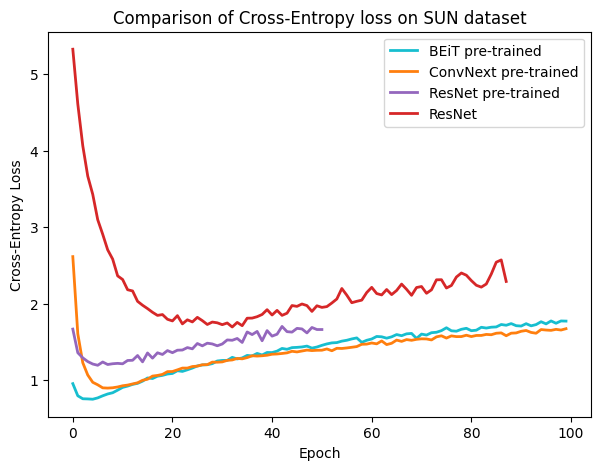

In [60]:
fig, ax = plt.subplots(figsize = (7, 5))
title = "Comparison of Cross-Entropy loss on SUN dataset"
ax.set_title(title)
for name, [x, y] in loss.items():

    y = inter(y)
    ax.plot(x, y, linewidth=2.0, label = name, color = palette[name])

ax.legend()
ax.set_xlabel("Epoch")
ax.set_ylabel("Cross-Entropy Loss")
plt.savefig(fname = pltName(title), format = "png")
plt.savefig(fname = pltNameSVG(title),  dpi = 1500, format = "svg")
plt.show()

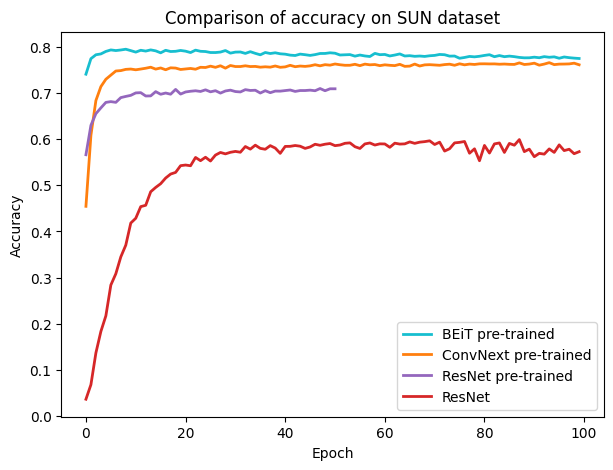

In [61]:
fig, ax = plt.subplots(figsize = (7, 5))
title = "Comparison of accuracy on SUN dataset"
ax.set_title(title)

for name, [x, y] in acc.items():

    ax.plot(x, y, linewidth=2.0, color = palette[name], label = name)

ax.legend()
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
plt.savefig(fname = pltName(title), format = "png")
plt.savefig(fname = pltNameSVG(title),  dpi = 1500, format = "svg")
plt.show()

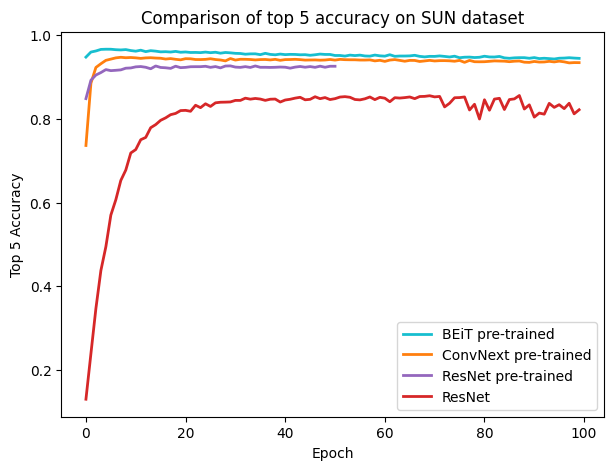

In [62]:
fig, ax = plt.subplots(figsize = (7, 5))
title = "Comparison of top 5 accuracy on SUN dataset"
ax.set_title(title)

for name, [x, y] in acc_5.items():

    ax.plot(x, y, linewidth=2.0, color = palette[name], label = name)

ax.legend()
ax.set_xlabel("Epoch")
ax.set_ylabel("Top 5 Accuracy")
plt.savefig(fname = pltName(title), format = "png")
plt.savefig(fname = pltNameSVG(title), dpi = 1500, format = "svg")

plt.show() 

In [ ]:
df_acc_checkpoint = pd.DataFrame(index = loss.keys(), columns = ["Accuracy", "Accuracy top 5", "Loss", "Epoch"])

for name, [x, y] in acc.items():
    m = np.nanargmax(y)
    df_acc_checkpoint.loc[name] =  [acc[name][1][m], acc_5[name][1][m], loss[name][1][m], x[m]]


df_acc_checkpoint.astype({"Accuracy":float,"Accuracy top 5":float,"Loss":float}).round({"Accuracy":3,"Accuracy top 5":3,"Loss":3})

,Accuracy,Accuracy top 5,Loss,Epoch
BEiT pre-trained,0.794,0.965,0.834,8
ConvNext pre-trained,0.765,0.937,1.612,93
ResNet pre-trained,0.709,0.926,1.616,47
ResNet,0.599,0.856,2.289,87


In [ ]:
df_loss_checkpoint = pd.DataFrame(index = loss.keys(), columns = ["Accuracy", "Accuracy top 5", "Loss", "Epoch"])

for name, [x, y] in loss.items():
    m = np.nanargmin(y)
    df_loss_checkpoint.loc[name] =  [acc[name][1][m], acc_5[name][1][m], y[m], x[m]]
                                     
df_loss_checkpoint.astype({"Accuracy":float,"Accuracy top 5":float,"Loss":float}).round({"Accuracy":3,"Accuracy top 5":3,"Loss":3})

,Accuracy,Accuracy top 5,Loss,Epoch
BEiT pre-trained,0.789,0.966,0.749,4
ConvNext pre-trained,0.748,0.947,0.895,7
ResNet pre-trained,0.681,0.915,1.193,5
ResNet,0.584,0.849,1.694,32


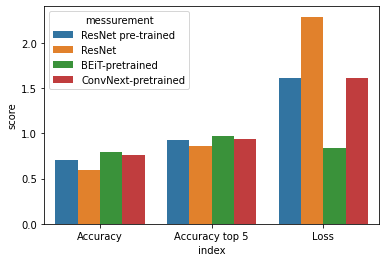

In [ ]:
df = df_acc_checkpoint.drop(columns = "Epoch").transpose()
df = df.reset_index()
df = pd.melt(df, id_vars="index", var_name="messurement", value_name="score")
df 
ax = sns.barplot(data=df, x = "index" , y = "score", hue = "messurement")

### My dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs/lightning_logs/beit_from_acc/metrics.csv")

In [ ]:
def create_dicts(dataframe):

    my_dict = {}

    cols_ = [col for col in df.columns if "grad" not in col]
    keys = [' '.join(col.split()[:3]) for col in cols_]
    keys = list(set(keys))
    keys.sort()
    keys.remove("step")
    keys.remove("epoch")
    s = ["step", "epoch"]


    for k in keys:

        xaxis = "epoch" if "epoch" in k else "step"
        cols = [col for col in df.columns if k in col] + [xaxis]
        dataf = df[cols].dropna().set_index(xaxis)

        dataf.columns = [key.split()[-1] for key in dataf.columns] # change names

        if "val epoch" in k:
            dataf.index += [0 if i%2 == 0 else 0.5 for i in range(len(dataf.index))] # two validation per loop

        dataf = dataf.drop(columns=["Crowd"], errors='ignore') # no crowd

        if "val" in k:
            dataf = dataf.drop(columns=["Road"], errors='ignore') # no road in validation

        my_dict[k] = dataf


    for k in keys:
        if "epoch f1" in k:
            dataf = my_dict[k]
            k2, avg = k + " average", ['micro','weighted', 'macro']
            my_dict[k2] = dataf[avg]
            my_dict[k] = dataf.drop(columns = ['micro','weighted', 'macro'])

In [ ]:
def val_epoch(my_dict, model_name, path):

    xaxis = "Epoch"

    data = my_dict["val epoch loss"]
    ax = data.plot(use_index=True)
    title = f"Binary Cross-Entropy Validation Loss {model_name}"

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("Loss")

    title = title.replace(" ", "_")
    title = os.path.join(path, title)
    plt.savefig(fname = pltName(title), format = "png")
    #plt.show() 


    data = my_dict["val epoch accuracy"]
    ax = data.plot(use_index=True)
    title = f"Binary Accuracy Validation {model_name}"

    ax.set_title()
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("Binary Accuracy")

    title = title.replace(" ", "_")
    title = os.path.join(path, title)
    plt.savefig(fname = pltName(title), format = "png")
    #plt.show() 

    data = my_dict["val epoch f1"]
    ax = data.plot(use_index=True)
    title = f"F1 score Validation {model_name}"

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("F1 score")

    title = title.replace(" ", "_")
    title = os.path.join(path, title)
    plt.savefig(fname = pltName(title), format = "png")
    #plt.show() 


    data = my_dict["val epoch f1 average"]
    ax = data.plot(use_index=True)
    title = f"F1 score Validation {model_name}"

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("F1 score")

    title = title.replace(" ", "_")
    title = os.join(path, title)
    plt.savefig(fname = pltName(title), format = "png")
    #plt.show() 


    data = my_dict["val epoch precision"]
    ax = data.plot(use_index=True)
    title = f"Precission Validation {model_name}"

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("Precission")

    title = title.replace(" ", "_")
    title = os.path.join(path, title)
    plt.savefig(fname = pltName(title), format = "png")
    #plt.show() 


    data = my_dict["val epoch recall"]
    ax = data.plot(use_index=True)
    title = f"Recall Validation {model_name}"

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel(f"Recall")

    title = title.replace(" ", "_") + ".png"
    title = os.join(path, title)
    plt.savefig(fname = pltName(title), format = "png")
    #plt.show() 

In [ ]:
def train_epoch(my_dict, model_name):

    xaxis = "Epoch"

    data = my_dict["train epoch loss"]
    ax = data.plot(use_index=True)
    ax.set_title(f"Binary Cross-Entropy Training Loss {model_name}")
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("Loss")
    plt.show() 


    data = my_dict["train epoch accuracy"]
    ax = data.plot(use_index=True)
    ax.set_title(f"Binary Accuracy Training {model_name}")
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("Binary Accuracy")
    plt.show() 


    data = my_dict["train epoch f1"]
    ax = data.plot(use_index=True)
    ax.set_title(f"F1 score Training {model_name}")
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("F1 score")
    plt.show()


    data = my_dict["train epoch f1 average"]
    ax = data.plot(use_index=True)
    ax.set_title(f"F1 score Training {model_name}")
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("F1 score")
    plt.show()


    data = my_dict["train epoch precision"]
    ax = data.plot(use_index=True)
    ax.set_title(f"Precission Training {model_name}")
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("Precission")
    plt.show()


    data = my_dict["train epoch recall"]
    ax = data.plot(use_index=True)
    ax.set_title(f"Recall Training {model_name}")
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel(f"Recall")
    plt.show()

In [ ]:
def on_step(my_dict, model_name):
    
    xaxis = "Step"

    data = my_dict['train step f1']
    ax = data.plot(use_index=True)
    ax.set_title(f"F1 score Training {model_name}")
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("Loss")
    plt.show() 

    data = my_dict["train step loss"]
    ax = data.plot(use_index=True)
    ax.set_title(f"Binary Cross-Entropy Training Loss {model_name}")
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("Loss")
    plt.show() 

    axis = "Epoch"

    data = my_dict['train step f1']
    ax = data.plot(use_index=True)
    ax.set_title(f"F1 score Validation Loss {model_name}")
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("Loss")
    plt.show() 

    data = my_dict["val step loss"]
    ax = data.plot(use_index=True)
    ax.set_title(f"Binary Cross-Entropy Validation Loss {model_name}")
    ax.legend()
    ax.set_xlabel(xaxis)
    ax.set_ylabel("Loss")
    plt.show() 

In [ ]:
models = os.listdir("/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs/lightning_logs")
models.sort()
names = ['beit_from_acc','beit_from_val','next_from_acc','next_from_val', 'resnet_from_acc', 'resnet_from_acc_untrained','resnet_from_val','resnet_from_val_untrained']

In [ ]:
data_dicts = []
for m, name in zip(models, names):

    df = pd.read_csv(f"/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs/lightning_logs/{m}/metrics.csv")

    new_dict = create_dicts(df)

    path = f"new_plots/{m}"

    val_epoch(new_dict, name, path)

    #train_epoch(new_dict, name)

    #on_step(new_dict, name)


In [ ]:
d ={}
# Training
d['train epoch accuracy'] = {
        "key" : 'train epoch accuracy',
        "xlabel": "Epoch",
        "ylabel" : "Accuracy",
        "title" : "Training Accuracy",
        }

d['train epoch f1'] = {
        "key" : 'train epoch f1',
        "xlabel": "Epoch",
        "ylabel" : "F1 score",
        "title" : "Training F1 score",
        }
        
d['train epoch f1 average'] = {
        "key" : 'train epoch f1 average',
        "xlabel": "Epoch",
        "ylabel" : "F1 score",
        "title" : "Training F1 score",
        }

d['train epoch loss'] = {
        "key" : 'train epoch loss',
        "xlabel": "Epoch",
        "ylabel" : "Loss",
        "title" : "Multilabel Binary Cross-Entropy Training Loss",
        }

d['train epoch precision'] = {
        "key" : 'train epoch precision',
        "xlabel": "Epoch",
        "ylabel" : "Precisison",
        "title" : "Training Precision",
        }

d['train epoch recall'] = {
        "key" : 'train epoch recall',
        "xlabel": "Epoch",
        "ylabel" : "Recall",
        "title" : "Training Recall",
        }
# Validaiton
d['val epoch accuracy'] = {
        "key" : 'val epoch accuracy',
        "xlabel": "Epoch",
        "ylabel" : "Accuracy",
        "title" : "Validation Accuracy",
        }

d['val epoch f1'] = {
        "key" : 'val epoch f1',
        "xlabel": "Epoch",
        "ylabel" : "F1 score",
        "title" : "Validation F1 score",
        }
        
d['val epoch f1 average'] = {
        "key" : 'val epoch f1 average',
        "xlabel": "Epoch",
        "ylabel" : "F1 score",
        "title" : "Validation F1 score",
        }

d['val epoch loss'] = {
        "key" : 'val epoch loss',
        "xlabel": "Epoch",
        "ylabel" : "Loss",
        "title" : "Multilabel Binary Cross-Entropy Validation Loss",
        }

d['val epoch precision'] = {
        "key" : 'val epoch precision',
        "xlabel": "Epoch",
        "ylabel" : "Precisison",
        "title" : "Validation Precision",
        }

d['val epoch recall'] = {
        "key" : 'val epoch recall',
        "xlabel": "Epoch",
        "ylabel" : "Recall",
        "title" : "Validation Recall",
        }

# Training step 
d['train step loss'] = {
        "key" : 'train step loss',
        "xlabel": "step",
        "ylabel" : "loss",
        "title" : "Multilabel Binary Cross-Entropy loss",
        }  
d['train step f1'] = {
        "key" : 'train step f1',
        "xlabel": "step",
        "ylabel" : "loss",
        "title" : "F1 score Training",
        }  
# Validation step
d['val step loss'] = {
        "key" : 'val step loss',
        "xlabel": "step",
        "ylabel" : "loss",
        "title" : "Multilabel Binary Cross-Entropy Training loss",
        }  
d['val step f1'] = {
        "key" : 'val step f1',
        "xlabel": "step",
        "ylabel" : "loss",
        "title" : "F1 score Training",
        }  

In [ ]:
def create_new_plot(key, my_dict, model_name, path, verbose):
    
    info = d[key]
    xlabel = info["xlabel"]
    ylabel = info["ylabel"]
    title = info["title"]

    data = my_dict[key]
    
    ax = data.plot(use_index=True)
    title = title + f" {model_name}"

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    title = title.replace(" ", "_") + ".png"
    title = os.path.join(path, title)
    plt.savefig(fname = title, format = "png")
    if verbose:
        plt.show()
    plt.cla()

In [ ]:
models = os.listdir("/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs/lightning_logs")
models.sort()
names = ['BeIT from acc','BeIT from val','ConvNext from acc','ConvNext from val', 'ResNet(pretrained) from acc', 'Resnet from acc','ResNet(pretrained) from val','ResNet from val']

In [ ]:
for m in models:
    os.mkdir(f"new_plots/{m}/")
    os.mkdir(f"new_plots/{m}/train/")
    os.mkdir(f"new_plots/{m}/val/")
    os.mkdir(f"new_plots/{m}/train/epoch/")
    os.mkdir(f"new_plots/{m}/train/step/")
    os.mkdir(f"new_plots/{m}/val/epoch/")
    os.mkdir(f"new_plots/{m}/val/step/")

In [ ]:
for m in models:
    shutil.rmtree(f"new_plots/{m}/")

In [ ]:
data_dicts = []
for m, name in zip(models, names):
    df = pd.read_csv(f"/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs/lightning_logs/{m}/metrics.csv")
    new_dict = create_dicts(df)
    
    for k in new_dict.keys():

        create_new_plot(key = k,
                        my_dict = new_dict,
                        model_name = name,
                        path = f"new_plots/{m}/{k.split()[0]}/{k.split()[1]}",
                        verbose = False)

In [ ]:
original = r'/content/new_plots'
target = r'/content/drive/MyDrive/MasterTensorboardandCheckpoits'

shutil.move(original, target)

'/content/drive/MyDrive/MasterTensorboardandCheckpoits/new_plots'

In [ ]:
q = list(new_dict.keys())
q.sort()
q

# Models comparisons

In [ ]:
palette = {'BeIT from acc':"tab:cyan",
           'BeIT from val':"tab:cyan",
           "ConvNext from acc":"tab:orange",
           "ConvNext from val":"tab:orange", 
           "ResNet from acc":"tab:purple",
           "ResNet from val":"tab:purple"}

In [ ]:
comparison_f1 = {}

models = os.listdir("/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs/lightning_logs")
models.remove('resnet_from_acc_untrained')
models.remove('resnet_from_val_untrained')
models.sort()
names =  ['BeIT from acc','BeIT from val','ConvNext from acc','ConvNext from val', 'ResNet from acc','ResNet from val']

for m, name in zip(models, names):
    df = pd.read_csv(f"/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs/lightning_logs/{m}/metrics.csv")
    new_dict = create_dicts(df)

    f1 = new_dict['val epoch f1 average']
    f1["name"] = name
    comparison_f1[m] = f1

In [ ]:
df_f1 = pd.concat(comparison_f1.values())

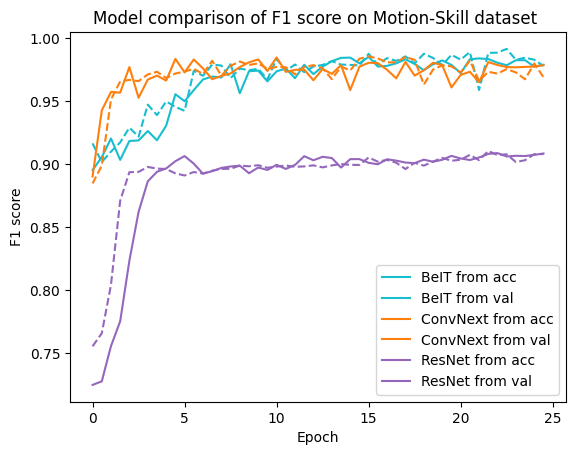

In [ ]:
fig, ax = plt.subplots()

ax = sns.lineplot(data=df_f1, x="epoch", y="micro", hue="name", palette=palette)

lss = ['solid', 'dashed'] * 3
for i, l in enumerate(lss):
    ax.lines[i].set_linestyle(l)

title = "Model comparison of F1 score on Motion-Skill dataset "
ax.set_title(title)

ax.legend()
ax.set_xlabel("Epoch")
ax.set_ylabel("F1 score")

title = title.replace(" ", "_") + ".png"
title = os.path.join("comparisons", title)
plt.savefig(fname = title, format = "png")

plt.show()

#**Test** 

In [ ]:
models = os.listdir("/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs_test/lightning_logs")
models.sort()
names = ['BeIT from acc','BeIT from val','ConvNext from acc','ConvNext from val', 'ResNet(pretrained) from acc', 'Resnet from acc','ResNet(pretrained) from val','ResNet from val']
ideal_order_names = ['BeIT from acc','BeIT from val','ConvNext from acc','ConvNext from val', 'ResNet(pretrained) from acc', 'ResNet(pretrained) from val', 'Resnet from acc','ResNet from val']

In [ ]:
dataframes = []
for m, name in zip(models, names):
    df = pd.read_csv(f"/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs_test/lightning_logs/{m}/metrics.csv")
    df["Model Name"] = name
    dataframes.append(df)
    

In [ ]:
df = pd.concat(dataframes)
df.set_index("Model Name", inplace = True)
df.drop(columns = ["epoch", "step"], inplace = True)
df = df.round(3)
df.columns = [col[11:] for col in df.columns]
df.drop(columns = [col for col in df.columns if "Crowd" in col], inplace = True)
df = df.loc[ideal_order_names]

In [ ]:
df_accuracy = df[[col for col in df.columns if "accuracy" in col]]
df_precision = df[[col for col in df.columns if "precision" in col]]
df_recall = df[[col for col in df.columns if "recall" in col]]
df_loss = df[[col for col in df.columns if "loss" in col]]
df_f1 = df[[col for col in df.columns if "f1" in col]]
dataframes = [df_accuracy, df_precision, df_recall, df_loss, df_f1]
for df in dataframes:
    df.columns = [col.split()[1] for col in df.columns]

In [ ]:
df_avg= df_f1[["micro","macro",	"weighted"]]
df_f1.drop(columns = ["micro","macro",	"weighted"], inplace = True)
dataframes.append(df_avg)

In [ ]:
df_accuracy

,Dynamic,Outdoor,Boundary,Constrained,Uneven,Road,Slope
Model Name,,,,,,,
BeIT from acc,0.965,1.000,0.896,0.977,0.992,0.888,0.970
BeIT from val,0.962,1.000,0.807,0.967,0.991,0.875,0.982
ConvNext from acc,0.960,0.999,0.925,0.991,0.991,0.908,0.962
ConvNext from val,0.962,1.000,0.849,0.964,0.988,0.870,0.985
ResNet(pretrained) from acc,0.955,1.000,0.763,0.962,0.969,0.800,0.970
ResNet(pretrained) from val,0.958,1.000,0.766,0.970,0.976,0.798,0.990
Resnet from acc,0.958,0.999,0.725,0.804,0.916,0.800,0.970
ResNet from val,0.709,1.000,0.760,0.774,0.898,0.800,0.970


In [ ]:
df_precision

,Dynamic,Outdoor,Boundary,Constrained,Uneven,Road,Slope
Model Name,,,,,,,
BeIT from acc,0.882,1.0,0.719,1.000,1.0,0.996,0.000
BeIT from val,0.872,1.0,0.572,1.000,1.0,1.000,1.000
ConvNext from acc,0.869,1.0,0.783,0.969,1.0,1.000,0.419
ConvNext from val,0.872,1.0,0.631,0.978,1.0,0.934,1.000
ResNet(pretrained) from acc,0.854,1.0,0.522,1.000,1.0,0.000,0.000
ResNet(pretrained) from val,0.861,1.0,0.523,0.963,1.0,0.286,0.985
Resnet from acc,0.862,1.0,0.479,0.980,1.0,0.000,0.000
ResNet from val,0.474,1.0,0.795,0.000,0.0,0.000,0.000


In [ ]:
df_recall

,Dynamic,Outdoor,Boundary,Constrained,Uneven,Road,Slope
Model Name,,,,,,,
BeIT from acc,1.000,1.000,0.977,0.900,0.920,0.443,0.000
BeIT from val,1.000,1.000,0.966,0.855,0.914,0.375,0.412
ConvNext from acc,1.000,0.999,0.979,0.992,0.910,0.538,0.670
ConvNext from val,1.000,1.000,0.985,0.862,0.886,0.378,0.515
ResNet(pretrained) from acc,1.000,1.000,0.872,0.830,0.694,0.000,0.000
ResNet(pretrained) from val,1.000,1.000,0.980,0.900,0.765,0.006,0.691
Resnet from acc,1.000,0.999,0.865,0.134,0.173,0.000,0.000
ResNet from val,0.999,1.000,0.086,0.000,0.000,0.000,0.000


In [ ]:
df_loss

,Dynamic,Outdoor,Boundary,Constrained,Uneven,Road,Slope
Model Name,,,,,,,
BeIT from acc,0.236,0.000,0.332,0.063,0.019,0.472,0.178
BeIT from val,0.265,0.000,0.919,0.082,0.049,0.756,0.088
ConvNext from acc,0.226,0.002,0.281,0.024,0.032,0.438,0.094
ConvNext from val,0.263,0.000,0.748,0.127,0.036,0.636,0.077
ResNet(pretrained) from acc,0.187,0.018,0.517,0.172,0.121,1.149,0.097
ResNet(pretrained) from val,0.189,0.003,0.673,0.069,0.053,0.918,0.035
Resnet from acc,0.134,0.020,0.590,0.323,0.163,1.049,0.122
ResNet from val,0.673,0.602,0.668,0.634,0.596,0.611,0.595


In [ ]:
df_f1

,Dynamic,Outdoor,Boundary,Constrained,Uneven,Road,Slope
Model Name,,,,,,,
BeIT from acc,0.937,1.0,0.828,0.947,0.958,0.613,0.000
BeIT from val,0.932,1.0,0.719,0.922,0.955,0.546,0.584
ConvNext from acc,0.930,1.0,0.870,0.980,0.953,0.700,0.516
ConvNext from val,0.932,1.0,0.770,0.916,0.939,0.539,0.680
ResNet(pretrained) from acc,0.921,1.0,0.653,0.907,0.820,0.000,0.000
ResNet(pretrained) from val,0.925,1.0,0.682,0.930,0.867,0.012,0.812
Resnet from acc,0.926,1.0,0.616,0.235,0.295,0.000,0.000
ResNet from val,0.643,1.0,0.155,0.000,0.000,0.000,0.000


In [ ]:
df_avg

,micro,macro,weighted
Model Name,,,
BeIT from acc,0.924,0.755,0.911
BeIT from val,0.900,0.808,0.896
ConvNext from acc,0.937,0.850,0.934
ConvNext from val,0.908,0.825,0.902
ResNet(pretrained) from acc,0.857,0.614,0.817
ResNet(pretrained) from val,0.870,0.747,0.839
Resnet from acc,0.787,0.439,0.714
ResNet from val,0.702,0.257,0.582


# **Test four models**

In [ ]:
models = os.listdir("/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs_test_four/lightning_logs")
models.sort()
print(models)
names = ['BeIT','ConvNext', 'ResNet pre-trained', 'ResNet']
#ideal_order_names = ['BeIT from acc','BeIT from val','ConvNext from acc','ConvNext from val', 'ResNet(pretrained) from acc', 'ResNet(pretrained) from val', 'Resnet from acc','ResNet from val']
dataframes = []

for m, name in zip(models, names):
    df = pd.read_csv(f"/content/drive/MyDrive/MasterTensorboardandCheckpoits/logs_test_four/lightning_logs/{m}/metrics.csv")
    df["Model Name"] = name
    dataframes.append(df)

df = pd.concat(dataframes)
df.set_index("Model Name", inplace = True)
df.drop(columns = ["epoch", "step"], inplace = True)
df = df.round(3)
df.columns = [col[11:] for col in df.columns]
df.drop(columns = [col for col in df.columns if "Crowd" in col], inplace = True)
#df = df.loc[ideal_order_names]

df_accuracy = df[[col for col in df.columns if "accuracy" in col]]
df_precision = df[[col for col in df.columns if "precision" in col]]
df_recall = df[[col for col in df.columns if "recall" in col]]
df_loss = df[[col for col in df.columns if "loss" in col]]
df_f1 = df[[col for col in df.columns if "f1" in col]]
dataframes = [df_accuracy, df_precision, df_recall, df_loss, df_f1]
for df in dataframes:
    df.columns = [col.split()[1] for col in df.columns]

df_avg= df_f1[["micro","macro",	"weighted"]]
df_f1.drop(columns = ["micro","macro",	"weighted"], inplace = True)
dataframes.append(df_avg)

['beit', 'convnext', 'resnet', 'resnet_untrained']


In [ ]:
df_accuracy

,Dynamic,Outdoor,Boundary,Constrained,Uneven,Road,Slope
Model Name,,,,,,,
BeIT,0.957,1.000,0.698,0.955,0.957,0.800,0.970
ConvNext,0.954,0.999,0.775,0.859,0.983,0.755,0.967
ResNet pre-trained,0.905,0.997,0.743,0.768,0.898,0.800,0.970
ResNet,0.916,0.997,0.856,0.775,0.967,0.799,0.970


In [ ]:
df_precision

,Dynamic,Outdoor,Boundary,Constrained,Uneven,Road,Slope
Model Name,,,,,,,
BeIT,0.859,1.0,0.454,0.997,1.000,0.000,0.0
ConvNext,0.850,1.0,0.534,0.904,0.989,0.045,0.0
ResNet pre-trained,0.734,1.0,0.494,0.043,1.000,0.000,0.0
ResNet,0.757,1.0,0.686,0.600,0.940,0.000,0.0


In [ ]:
df_recall

,Dynamic,Outdoor,Boundary,Constrained,Uneven,Road,Slope
Model Name,,,,,,,
BeIT,1.0,1.000,0.882,0.804,0.580,0.000,0.0
ConvNext,1.0,0.999,0.947,0.418,0.840,0.011,0.0
ResNet pre-trained,1.0,0.997,0.273,0.001,0.003,0.000,0.0
ResNet,1.0,0.997,0.805,0.013,0.725,0.000,0.0


In [ ]:
df_loss

,Dynamic,Outdoor,Boundary,Constrained,Uneven,Road,Slope
Model Name,,,,,,,
BeIT,0.165,0.037,0.684,0.217,0.119,0.635,0.137
ConvNext,0.240,0.004,0.817,0.361,0.055,1.192,0.138
ResNet pre-trained,0.429,0.076,0.533,0.637,0.262,0.651,0.175
ResNet,0.397,0.045,0.419,0.529,0.163,0.622,0.194


In [ ]:
df_f1

,Dynamic,Outdoor,Boundary,Constrained,Uneven,Road,Slope
Model Name,,,,,,,
BeIT,0.924,1.000,0.599,0.890,0.734,0.000,0.0
ConvNext,0.919,1.000,0.683,0.571,0.908,0.018,0.0
ResNet pre-trained,0.846,0.998,0.352,0.003,0.006,0.000,0.0
ResNet,0.862,0.998,0.741,0.025,0.819,0.000,0.0


In [ ]:
df_avg

,micro,macro,weighted
Model Name,,,
BeIT,0.839,0.593,0.805
ConvNext,0.826,0.586,0.790
ResNet pre-trained,0.743,0.315,0.632
ResNet,0.811,0.492,0.724


In [ ]:
df_avg.micro - df_avg.macro

Model Name
BeIT                  0.246
ConvNext              0.240
ResNet pre-trained    0.428
ResNet                0.319
dtype: float64